### CREDIT CARD FRAUD DETECTION

Importing the necessary libraries!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Load the data!

In [2]:
data = pd.read_csv('creditcard.csv')
data.shape

(284807, 31)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<b>EDA</b>

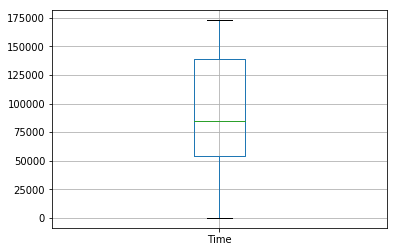

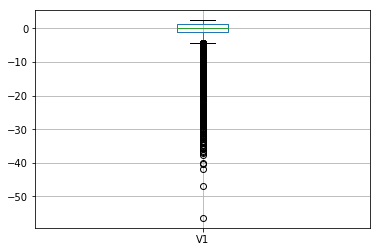

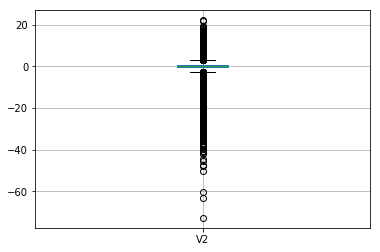

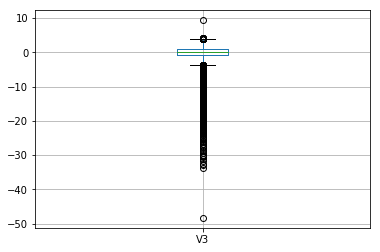

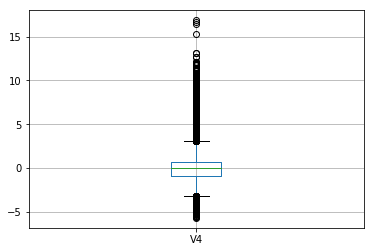

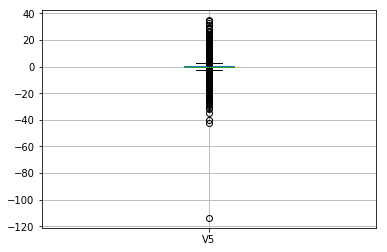

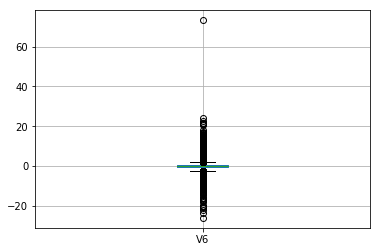

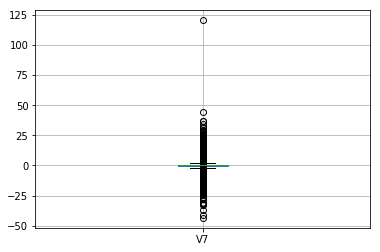

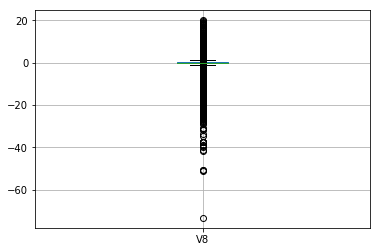

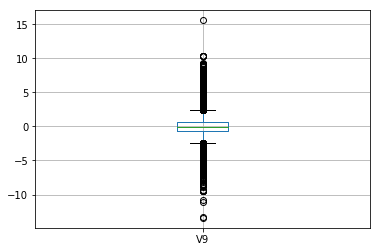

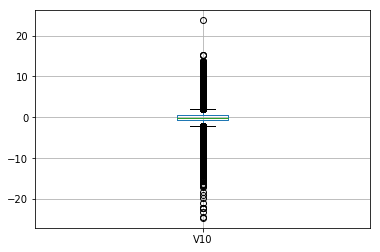

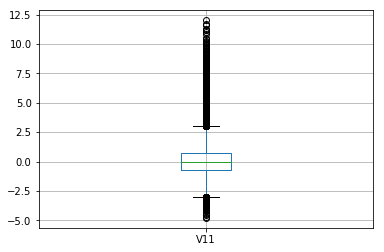

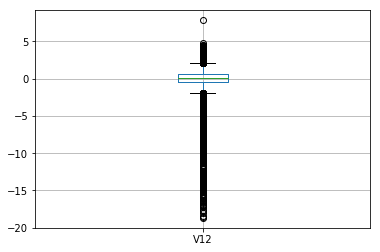

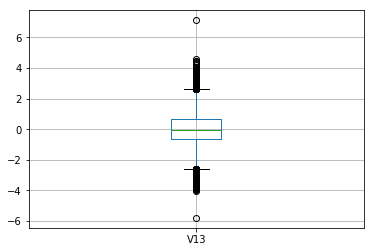

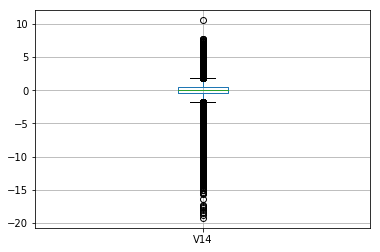

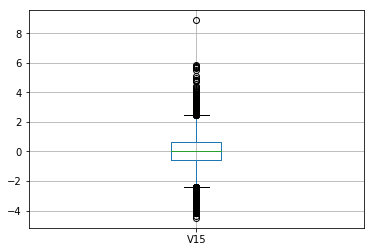

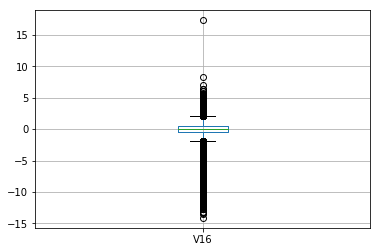

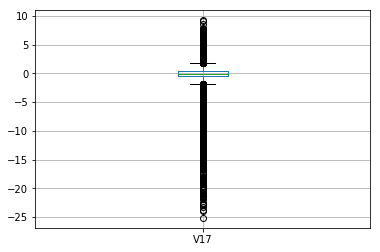

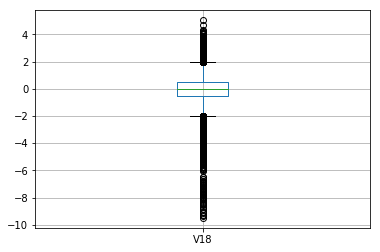

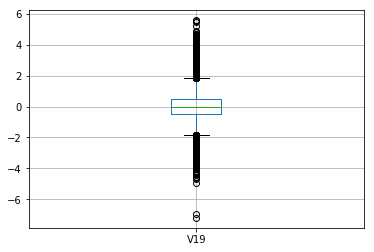

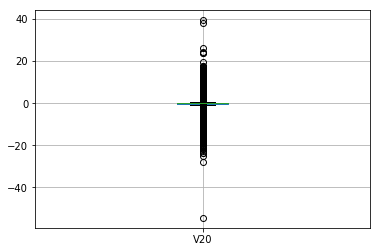

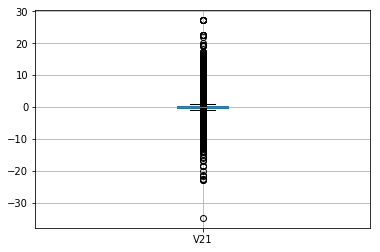

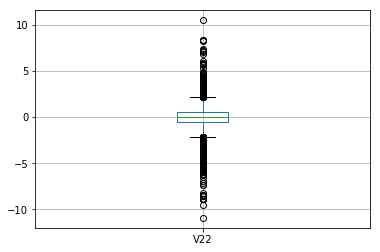

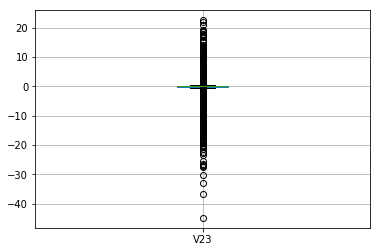

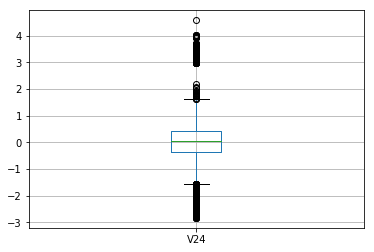

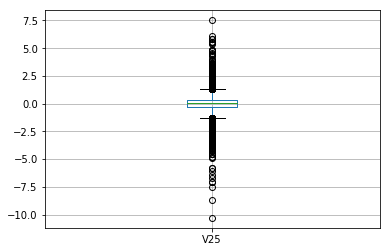

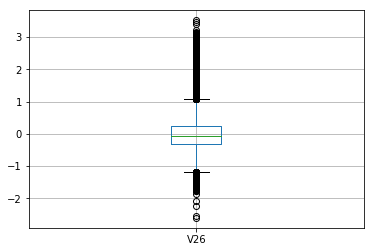

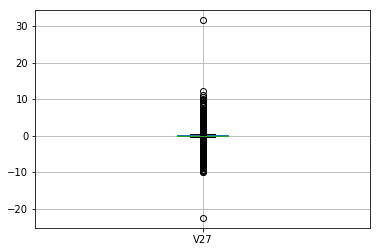

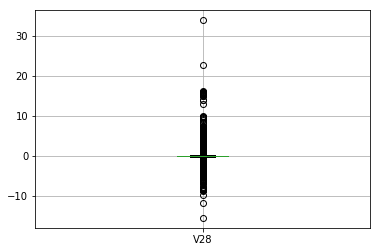

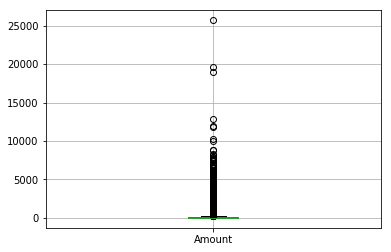

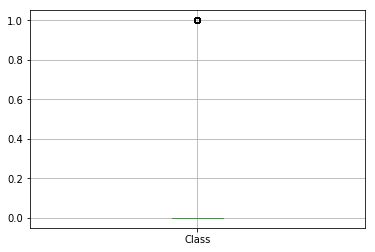

In [4]:
def box(df):
    numerical_cols = df.describe().columns.tolist()
    for i in df.loc[:,numerical_cols]:
        df.boxplot(i)
        plt.show()
        
box(data)

In [7]:
def get_summary(df):
    
    for i in df.columns[1:]:

        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print(i)
            print('Maximum :',df[i].max())
            print('Minimum :', df[i].min())
            print('Mean :',df[i].mean())
            print('Median :',df[i].median())
            print('Mode :',df[i].mode()[0])
            print('\n')

        else:
            print(df[i].value_counts())
            print('\n')
            
get_summary(data)

V1
Maximum : 2.45492999121121
Minimum : -56.407509631329
Mean : 3.919560084655042e-15
Median : 0.0181087991615309
Mode : 1.24567381944824


V2
Maximum : 22.0577289904909
Minimum : -72.7157275629303
Mean : 5.688174400270728e-16
Median : 0.0654855563960555
Mode : -0.32666777306077005


V3
Maximum : 9.38255843282114
Minimum : -48.3255893623954
Mean : -8.76907126289773e-15
Median : 0.17984634356354398
Mode : -2.75204095570008


V4
Maximum : 16.8753440335975
Minimum : -5.68317119816995
Mean : 2.782312291808533e-15
Median : -0.0198465294811989
Mode : -0.842316033286871


V5
Maximum : 34.8016658766686
Minimum : -113.74330671114599
Mean : -1.5525630329923732e-15
Median : -0.0543358267364858
Mode : -0.5627766807738629


V6
Maximum : 73.3016255459646
Minimum : -26.1605059358433
Mean : 2.010663493875542e-15
Median : -0.27418707650665103
Mode : -1.01107261632698


V7
Maximum : 120.589493945238
Minimum : -43.5572415712451
Mean : -1.694249132734738e-15
Median : 0.0401030827945351
Mode : -0.432125923

Histogram of : Time


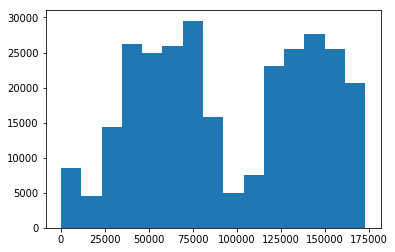

Histogram of : V1


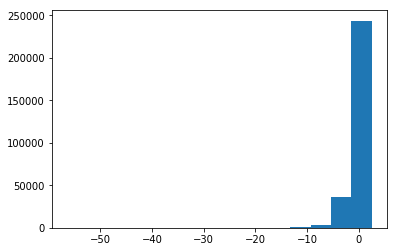

Histogram of : V2


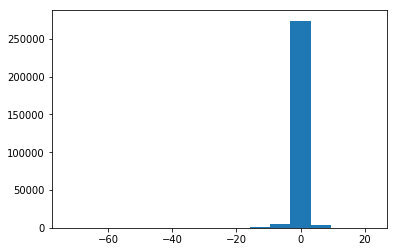

Histogram of : V3


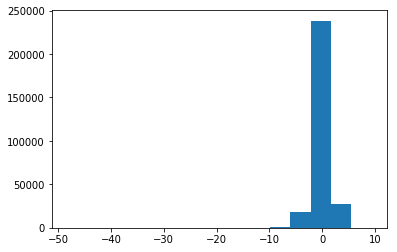

Histogram of : V4


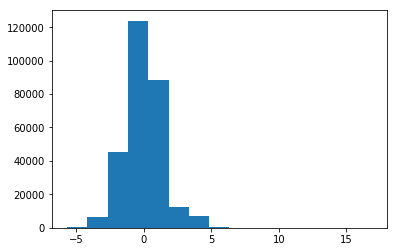

Histogram of : V5


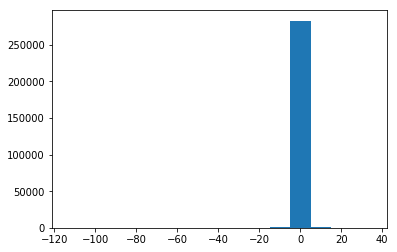

Histogram of : V6


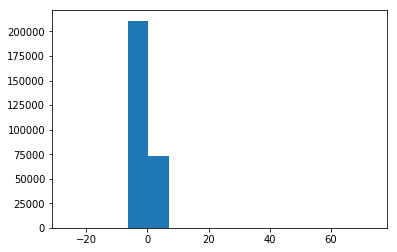

Histogram of : V7


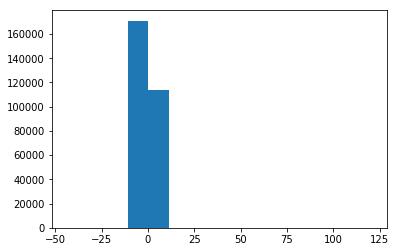

Histogram of : V8


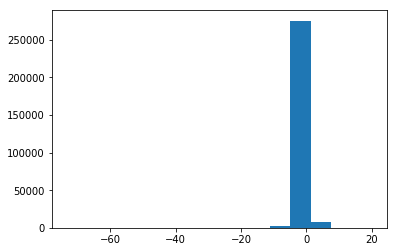

Histogram of : V9


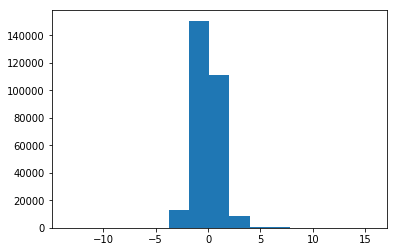

Histogram of : V10


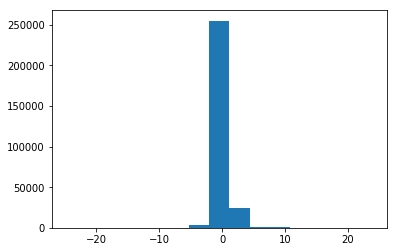

Histogram of : V11


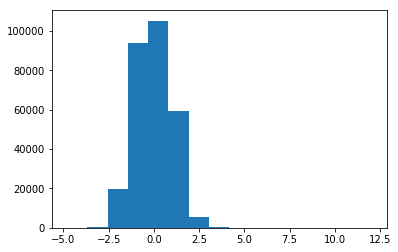

Histogram of : V12


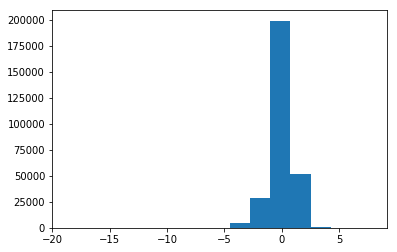

Histogram of : V13


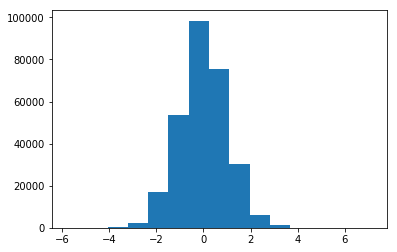

Histogram of : V14


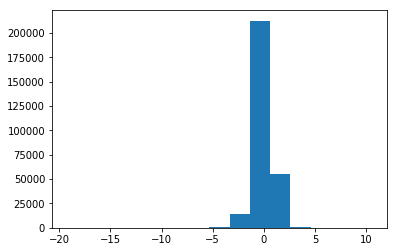

Histogram of : V15


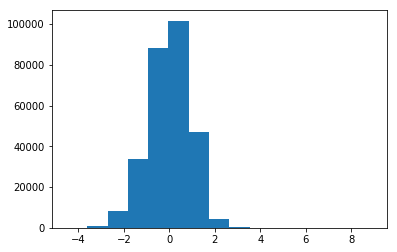

Histogram of : V16


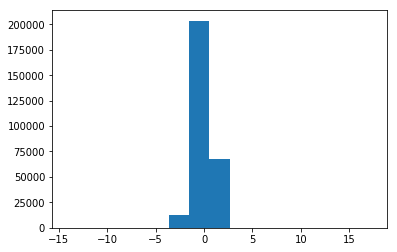

Histogram of : V17


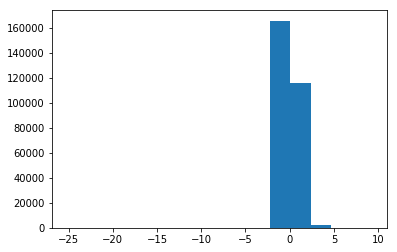

Histogram of : V18


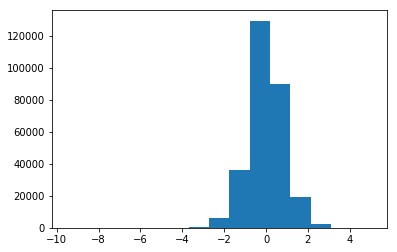

Histogram of : V19


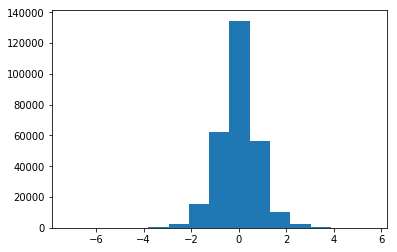

Histogram of : V20


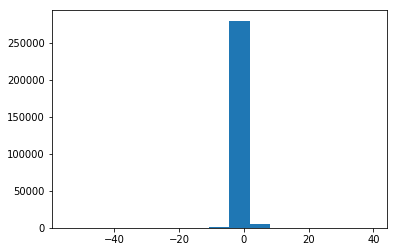

Histogram of : V21


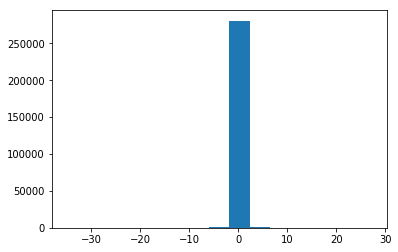

Histogram of : V22


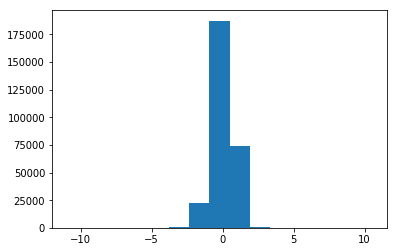

Histogram of : V23


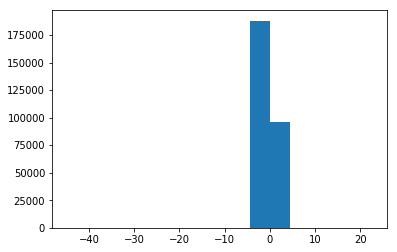

Histogram of : V24


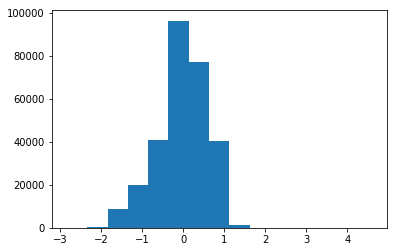

Histogram of : V25


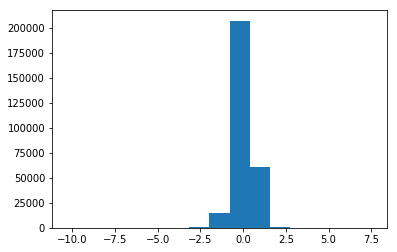

Histogram of : V26


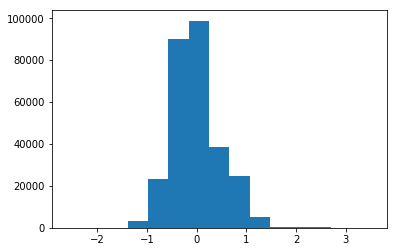

Histogram of : V27


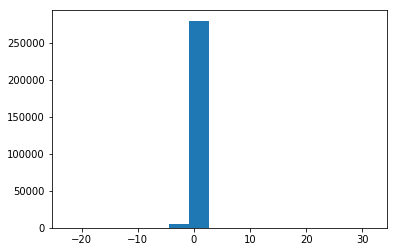

Histogram of : V28


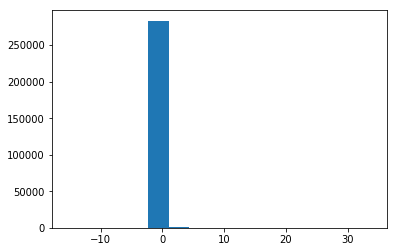

Histogram of : Amount


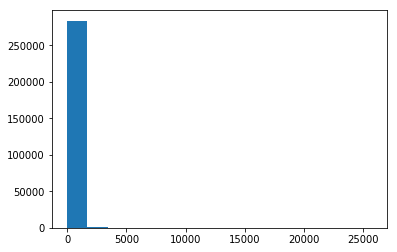

In [6]:
def plot_vars(df):
    for i in df.columns[:30]:
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print('Histogram of :',i)
            plt.hist(df[i],bins=15)
            plt.show()
        else:
            print('Bar graph of :',i)
            plt.bar(df[i].unique().tolist(),df[i].value_counts().tolist())
            plt.show()
            
plot_vars(data)

<b>Outlier Analysis

Since we do not know the cause of the outliers because the variable names are unknown in this dataset we will leave it untouched at the beginning

For Amount column though which has massive outliers, it could be that these irregular amounts actually have meaning in predicting the frauds. Let us find out.

In [8]:
def outlier(col):
    
    q75,q25 = np.percentile(col, [75,25])
    
    iqr = q75 - q25
        
    outlier_left = q25 - 1.5*iqr
    
    outlier_right = q75 + 1.5*iqr
    
    return (outlier_left, outlier_right)

In [9]:
outlier(data['Amount'])

(-101.7475, 184.5125)

In [10]:
data[(data['Amount'] < -101.7475) | (data['Amount'] > 184.5125)].shape

(31904, 31)

In [11]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
data[(data['Amount'] < -101.7475) | (data['Amount'] > 184.5125)]['Class'].value_counts()

0    31813
1       91
Name: Class, dtype: int64

In [13]:
print('Not Fraud:')
print('With Outliers :',31813/284315)
print('Without Outliers :',1 - 31813/284315)

Not Fraud:
With Outliers : 0.11189349840845542
Without Outliers : 0.8881065015915446


In [14]:
print('Fraud:')
print('With Outliers :',91/492)
print('Without Outliers :',1 - 91/492)

Fraud:
With Outliers : 0.18495934959349594
Without Outliers : 0.8150406504065041


There is no pattern as such with the Amount variable alone, but we will keep the outliers because they could mean something in the prediction. Here, maximum of outliers are associated with not fraud class.

<b>Clustering to examine separability

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

clust_data = data.copy()

cd = clust_data.drop(columns='Class')
cd = minmax_scale(cd)

K = KMeans(n_clusters=2).fit(cd)
K.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
print(clust_data.shape)

len(K.labels_)

(284807, 31)


284807

In [17]:
clust_data['Clust'] = list(K.labels_)

In [18]:
clust_data[clust_data['Clust'] == 1]['Class'].value_counts()

0    131664
1       158
Name: Class, dtype: int64

In [19]:
clust_data[clust_data['Clust'] == 0]['Class'].value_counts()

0    152651
1       334
Name: Class, dtype: int64

In [20]:
print('Cluster 1:')
print('Not fraud :',131662/284315)
print('Fraud :',158/492)
print('\n')
print('Cluster 0')
print('Not fraud :',152653/284315)
print('Fraud :',334/492)

Cluster 1:
Not fraud : 0.4630849585846684
Fraud : 0.32113821138211385


Cluster 0
Not fraud : 0.5369150414153316
Fraud : 0.6788617886178862


The data can possibly be non-linearly separable if K-means could not make good clusters with it

<b>Data Preparation

In [23]:
def show_unimp_vars(df,max_corr):

    dfq = df.corr()

    corr = []

    for ind,row in dfq.iterrows():
        for i in row.index.tolist():
            if ind != i and abs(row[i]) > max_corr:
                if (i,ind) in corr:
                    continue
                else:
                    corr.append((ind,i))
    
    return corr


corr_list = show_unimp_vars(data, max_corr = 0.65)

In [24]:
corr_list

[]

Checking the class imbalance

In [25]:
print('Majority class :',data['Class'].value_counts()[0]/len(data))
print('Minority class :',1 - data['Class'].value_counts()[0]/len(data))

Majority class : 0.9982725143693799
Minority class : 0.0017274856306200848


In [26]:
def preprocessing_X(df):  
    
    X_ = df.copy()
    
    X_.drop(columns=['Class'],inplace=True)
    
    from sklearn.preprocessing import MinMaxScaler

    STS = MinMaxScaler()

    X_[X_.select_dtypes(['int64','float64']).columns.tolist()] = STS.fit_transform(X_[X_.select_dtypes(['int64','float64']).columns.tolist()])
    
    return X_

X = preprocessing_X(data)

In [27]:
y = data['Class']

<b>Plotting the data roughly to see its structure:</b>

The dataset seems to be very noisy!

In 2d:

In [28]:
from sklearn.decomposition import PCA

[0.0762983  0.00665884] 



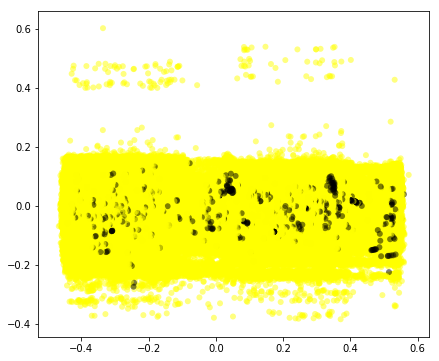

In [29]:
def pca_plot_2d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=2).fit(design_matrix)
    print(pca_plot.explained_variance_,'\n')
    pcs = pca_plot.transform(design_matrix)

    label_colour = {target.unique().tolist()[0]:'yellow',target.unique().tolist()[1]:'black'}
    color_vec = [label_colour[label] for label in list(target)]

    plt.figure(figsize=(7,6))
    plt.scatter(pcs[:,0], pcs[:,1],c=color_vec, edgecolor='', alpha=0.5)
    plt.show()
    
pca_plot_2d_binaryclass(X,y)

In 3d:

[0.0762983  0.00665884 0.00619656] 



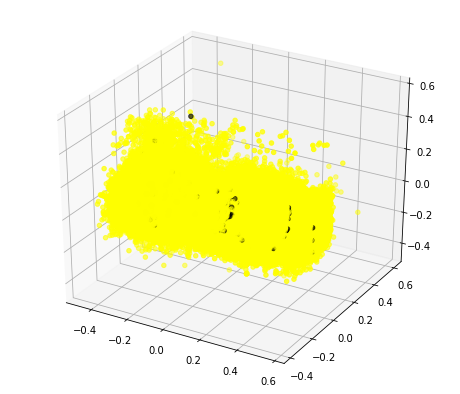

In [30]:
def pca_plot_3d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=3).fit(design_matrix)
    print(pca_plot.explained_variance_,'\n')
    pcs = pca_plot.transform(design_matrix)

    label_colour = {target.unique().tolist()[0]:'yellow',target.unique().tolist()[1]:'black'}
    color_vec = [label_colour[label] for label in list(target)]

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection='3d')
    xs = pcs[:,0] 
    ys = pcs[:,1]
    zs = pcs[:,2]
    ax.scatter(xs,ys,zs,c=color_vec, marker = 'o')
    plt.show()
    
pca_plot_3d_binaryclass(X,y)

Variance explained by the 1st component itself was not very high which means a linear plane could not be fit and data could not be projected on it easily and the data doesn't look so separable as well in this figure.

<b>Model Building:

In [31]:
def model_built(X1,y1, test_ratio):
    
    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio)
      
    from sklearn.linear_model import LogisticRegression

    linreg = LogisticRegression(solver='liblinear').fit(X_train,y_train)
    
    return linreg, X_train, X_test, y_train, y_test

LR,X_train, X_test, y_train, y_test = model_built(X, y, 0.25)

In [32]:
y_lr_train = LR.predict(X_train)

y_lr_test = LR.predict(X_test)

In [35]:
def metrics(y_tn, y_pred_tn, y_ts, y_pred_ts):

    from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
    
    tn_ts, fp_ts, fn_ts, tp_ts = confusion_matrix(y_test, y_pred_ts).ravel()
    
    tn_tn, fp_tn, fn_tn, tp_tn = confusion_matrix(y_train, y_pred_tn).ravel()
    
    print('True Positives on train:',tp_tn)
    print('True Negatives on train:',tn_tn)
    print('False Positives on train:',fp_tn)
    print('False Negatives on train:',fn_tn)
    print('\n')
    print('True Positives on test:',tp_ts)
    print('True Negatives on test:',tn_ts)
    print('False Positives on test:',fp_ts)
    print('False Negatives on test:',fn_ts)
    
    print('\n')
    print('----------------------------------------------------------')
    
    specificity_tn = tn_tn/(tn_tn + fp_tn)
    
    specificity_ts = tn_ts/(tn_ts + fp_ts)
    
    
    fpr_tn = fp_tn/(tn_tn + fp_tn)
    
    fpr_ts = fp_ts/(tn_ts + fp_ts)
    
    print('Specificity on train data :',specificity_tn)
    
    print('Specificity on test data :',specificity_ts)
    
    print('\n')
    print('---------------------------------------------------------')
    
    print('FPR on train data :',fpr_tn)
    
    print('FPR on test data :',fpr_ts)
    
    print('\n')
    print('----------------------------------------------------------')
    
    print('Training accuracy :', accuracy_score(y_tn, y_pred_tn))
    print('Test accuracy :', accuracy_score(y_ts, y_pred_ts))
    
    
    
metrics(y_train, y_lr_train, y_test, y_lr_test)

True Positives on train: 176
True Negatives on train: 213232
False Positives on train: 28
False Negatives on train: 169


True Positives on test: 75
True Negatives on test: 71045
False Positives on test: 10
False Negatives on test: 72


----------------------------------------------------------
Specificity on train data : 0.9998687048672982
Specificity on test data : 0.9998592639504609


---------------------------------------------------------
FPR on train data : 0.00013129513270186626
FPR on test data : 0.00014073604953908944


----------------------------------------------------------
Training accuracy : 0.9990777369443599
Test accuracy : 0.9988483469565461


In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_train, y_lr_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213260
           1       0.86      0.51      0.64       345

   micro avg       1.00      1.00      1.00    213605
   macro avg       0.93      0.76      0.82    213605
weighted avg       1.00      1.00      1.00    213605



In [39]:
print(classification_report(y_test, y_lr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.88      0.51      0.65       147

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.94      0.76      0.82     71202
weighted avg       1.00      1.00      1.00     71202



<b>If we let a Decision Tree grow a little, it can handle a little of class imbalance but it could overfit as well!</b>

In [40]:
class_weights = {1:0.5,0:0.5}

In [41]:
def DecTrees(mx_depth,cw,test_ratio,X1,y1):
    
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio) 
    
    from sklearn.tree import DecisionTreeClassifier

    Dt = DecisionTreeClassifier(max_depth = mx_depth).fit(X_train,y_train)
    
    y1_train = Dt.predict(X_train)

    y1_test = Dt.predict(X_test)
    
    return Dt, X_train, X_test, y_train, y_test,y1_train, y1_test

DT, X2_train, X2_test,y2_train, y2_test, y_dt_train, y_dt_test = DecTrees(6,class_weights,0.25,X,y)

In [42]:
metrics(y_train, y_dt_train, y_test, y_dt_test)

True Positives on train: 286
True Negatives on train: 213254
False Positives on train: 6
False Negatives on train: 59


True Positives on test: 119
True Negatives on test: 71042
False Positives on test: 13
False Negatives on test: 28


----------------------------------------------------------
Specificity on train data : 0.9999718653287067
Specificity on test data : 0.9998170431355992


---------------------------------------------------------
FPR on train data : 2.8134671293257058e-05
FPR on test data : 0.00018295686440081627


----------------------------------------------------------
Training accuracy : 0.9996957000070223
Test accuracy : 0.9994241734782731


In [43]:
## For training set:

from sklearn.metrics import classification_report

print(classification_report(y_train,y_dt_train))

print('---------------------------------------------------------')

## For test set:

print(classification_report(y_test,y_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213260
           1       0.98      0.83      0.90       345

   micro avg       1.00      1.00      1.00    213605
   macro avg       0.99      0.91      0.95    213605
weighted avg       1.00      1.00      1.00    213605

---------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.90      0.81      0.85       147

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.95      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



Performed so much better than Linear Regression as the data must not be very linearly separable

<b> Random Forest can remove the slight overfitting from the previous model and is also known to handle a little class imbalance</b>

In [45]:
def RanFor(trees,cw,test_ratio,mx_depth,X1,y1):
    
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio) 
    
    from sklearn.ensemble import RandomForestClassifier

    Rf =RandomForestClassifier(n_estimators=trees, max_depth = mx_depth).fit(X_train,y_train)
    
    y_train = Rf.predict(X_train)

    y_test = Rf.predict(X_test)
    
    return Rf, X_train, y_train, X_test, y_test

RF, X3_train, y_rf_train, X3_test, y_rf_test = RanFor(300,class_weights,0.25,7,X,y)

In [46]:
metrics(y_train, y_rf_train, y_test, y_rf_test)

True Positives on train: 276
True Negatives on train: 213259
False Positives on train: 1
False Negatives on train: 69


True Positives on test: 110
True Negatives on test: 71053
False Positives on test: 2
False Negatives on test: 37


----------------------------------------------------------
Specificity on train data : 0.9999953108881178
Specificity on test data : 0.9999718527900922


---------------------------------------------------------
FPR on train data : 4.68911188220951e-06
FPR on test data : 2.8147209907817887e-05


----------------------------------------------------------
Training accuracy : 0.9996722923152548
Test accuracy : 0.9994522625768939


In [47]:
## For training set:

print(classification_report(y_train,y_rf_train))

print('---------------------------------------------------------')

## For test set:

print(classification_report(y_test,y_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213260
           1       1.00      0.80      0.89       345

   micro avg       1.00      1.00      1.00    213605
   macro avg       1.00      0.90      0.94    213605
weighted avg       1.00      1.00      1.00    213605

---------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.98      0.75      0.85       147

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.99      0.87      0.92     71202
weighted avg       1.00      1.00      1.00     71202



<b>FIN</b>